In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# import data as pandas dataframes

df_no2 = pd.read_csv('lfu_data/no2_2019.csv', delimiter = ";")

#convert data to useful datatypes
df_no2['timestamp'] = pd.to_datetime(df_no2.Zeitpunkt, format='%d.%m.%y %H:%M', errors = 'coerce')
df_no2['NO2']=pd.to_numeric(df_no2['NO2'], errors='coerce')
df_no2 = df_no2.dropna() # delete rows with NaN values

#drop useless columns
df_no2.drop('Zeitpunkt', axis = 'columns', inplace = True)

#show dataframe
df_no2.head()

,NO2,timestamp
0,48.0,2019-01-01 01:00:00
1,57.0,2019-01-01 02:00:00
2,43.0,2019-01-01 03:00:00
3,22.0,2019-01-01 04:00:00
4,20.0,2019-01-01 05:00:00


200 µg/m^3 violation on 2019-02-16 20:00:00 with a value of 202.0 µg/m^3.

Annual mean value = 63.28250746268657 µg/m^3


Text(0, 0.5, 'NO2 concentration [µg/m^3]')

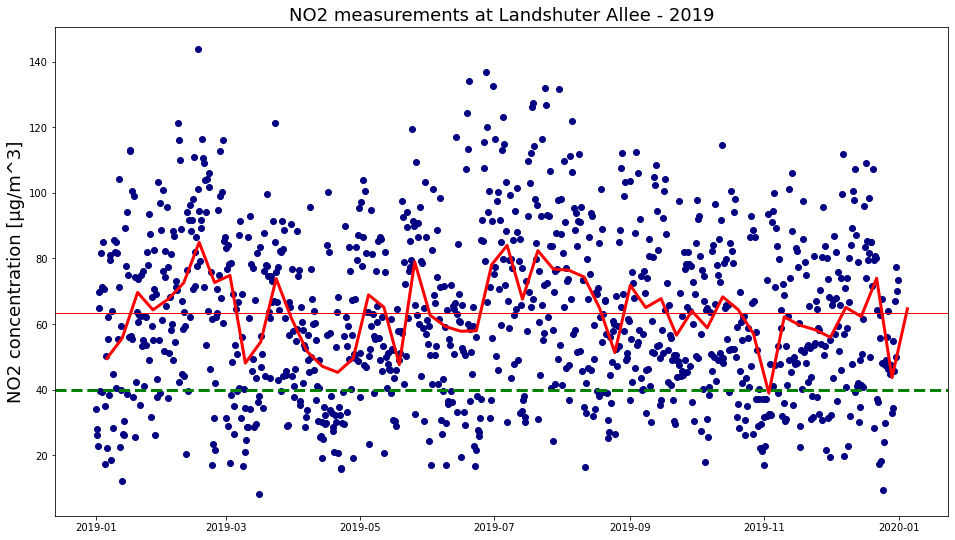

In [207]:
# calculate no2 limit violations 
violations = df_no2[df_no2['NO2']>=200]

for idx,el in violations.iterrows(): 
    print("200 µg/m^3 violation on {} with a value of {} µg/m^3.".format(el['timestamp'], el['NO2']))

# calculate annual mean value
annual_mean = df_no2['NO2'].mean()
print('\nAnnual mean value = {} µg/m^3'.format(annual_mean))

# calculate daily mean value and plot as a graph
df_daily = df_no2.set_index(['timestamp'])
daily_average = df_daily['NO2'].resample('8h').mean()
weekly_average = df_daily['NO2'].resample('W').mean()

#daily_average.head()

fig,ax = plt.subplots(figsize=[16,9])

ax.scatter(y=daily_average,x=daily_average.index, color = "Navy")
ax.plot(weekly_average, color = "r", linewidth = 3)

ax.axhline(40, color = 'g', linestyle = "--", linewidth = 3) # 40µg/m^3 value
ax.axhline(annual_mean, color = 'r' , linewidth = 1)

ax.set_title('NO2 measurements at Landshuter Allee - 2019', size = 18)
ax.set_ylabel('NO2 concentration [µg/m^3]', size= 18)
#ax.set_xlabel('Timestamp', size = 18)

In [3]:
# this dataset was exported from a different project 
df_traffic = pd.read_csv('traffic_data/traffic_landshuter_alee.csv')
df_traffic.drop('Unnamed: 0', axis = 'columns', inplace = True)

# convert date column
df_traffic['date']=pd.to_datetime(df_traffic['date'])

df_traffic.head()

,mst_id,det_id,date,dtv,values,weekday,day_type,yeartime
0,4014,4014011,2019-03-31,6471,"[0.020398701900788133, 0.01329006335960439, 0....",6,2.0,1.0
1,4014,4014011,2019-03-30,8055,"[0.01154562383612663, 0.008690254500310366, 0....",5,2.0,1.0
2,4014,4014011,2019-03-29,10767,"[0.006129841181387573, 0.00399368440605554, 0....",4,1.0,1.0
3,4014,4014011,2019-03-28,10490,"[0.004289799809342231, 0.003336510962821735, 0...",3,1.0,1.0
4,4014,4014011,2019-03-27,10418,"[0.005087348819351123, 0.0017277788443079286, ...",2,1.0,1.0


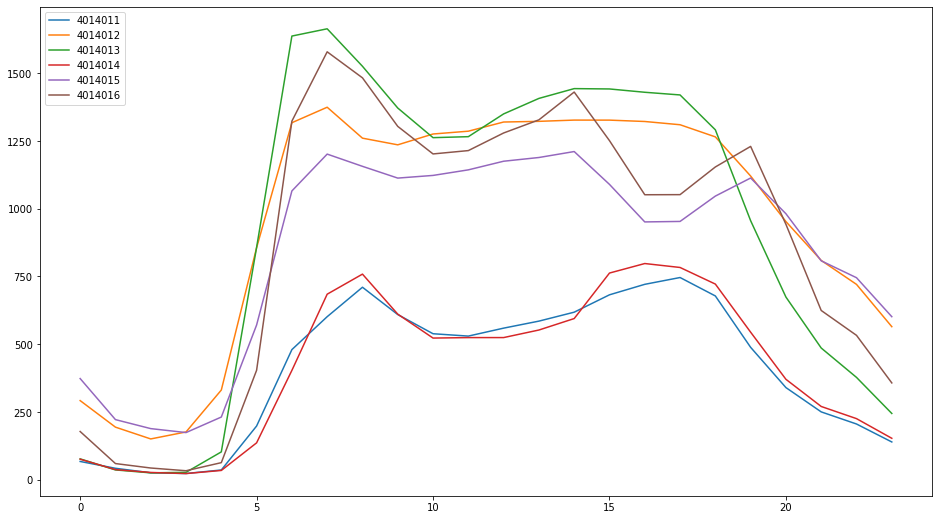

In [4]:
# investigate average diurnial cycle of the traffic 
from operator import add

def convert_values(string_in): 
    return list(map(float, string_in[1:-1].split(','))) # convert list elements to float

# calculate average daily cycle for each detector (only use normal weekdays -> day_type = 1)
df_traffic_weekdays = df_traffic[df_traffic['day_type']==1]
df_traffic_weekdays.reset_index(inplace = True)

#calculate average for each detector
detectors = df_traffic['det_id'].unique()

fig,ax = plt.subplots(figsize=[16,9])

dict1 = {}

for detector in detectors: 
    lst = [0] * 24
    
    df_det = df_traffic_weekdays[df_traffic_weekdays['det_id']==detector]
    #df_det.reset_index(inplace = True)
    
    for idx, row in df_det.iterrows():
        temp = convert_values(row['values'])
        temp = [row['dtv']*x for x in temp]

        lst = list(map(add, lst, temp))
        
    lst = np.asarray(lst)/len(df_det)
    
    dict1[detector]=lst
    
    plt.plot(lst, label = detector)

plt.legend(loc="upper left")
plt.show()

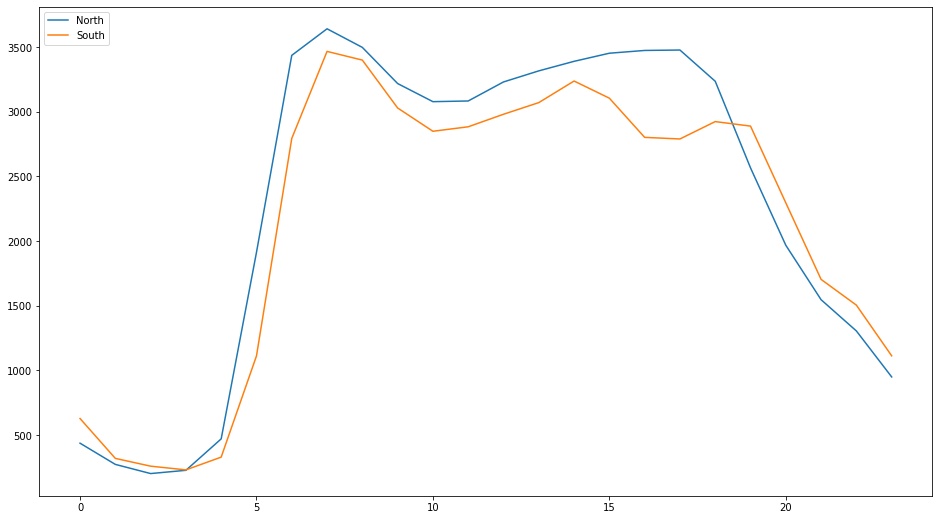

In [212]:
# all diurnial cycles are now saved in det_list
# sum up all average cycles for each direction
# direction North: 4014011, 4014012, 4014013
# direction South: 4014014, 4014015, 4014016


cycle_north = dict1[4014011] + dict1[4014012] + dict1[4014013]
cycle_south = dict1[4014014] + dict1[4014015] + dict1[4014016]

fig,ax = plt.subplots(figsize=[16,9])

plt.plot(cycle_north, label = 'North')
plt.plot(cycle_south, label = 'South')

plt.legend(loc="upper left")
plt.show()


In [205]:
# now compare average cycle with cycle of an day with high NO2 value and the corresponding NO2 Values
#fig,ax = plt.subplots(figsize=[16,9])

df_single_date = df_traffic[df_traffic['date']=="2019-04-17"]
    
df_single_date.head()


,mst_id,det_id,date,dtv,values,weekday,day_type,yeartime
290,4014,4014011,2019-04-17,9627,"[0.005505349537758388, 0.003531733665731796, 0...",2,5.0,1.0
381,4014,4014012,2019-04-17,23248,"[0.010839642119752236, 0.006108052305574673, 0...",2,5.0,1.0
472,4014,4014013,2019-04-17,22444,"[0.0023168775619319196, 0.0008019960791302798,...",2,5.0,1.0
563,4014,4014014,2019-04-17,10248,"[0.00663544106167057, 0.002927400468384075, 0....",2,5.0,1.0
654,4014,4014015,2019-04-17,20466,"[0.015977719143946058, 0.0079155672823219, 0.0...",2,5.0,1.0
